# TRABALHO DE IAA015 – Tópicos de Inteligência Artificial

## Equipe 03
* Gustavo Costa de Souza
* Marcos Vinicius de Melo
* Marcus Eneas Silveira Galvao do Rio Apa II
* Patrícia Verdugo Pascoal
* Rodrigo de Araujo
* William de Souza Alencar

Este trabalho deve ser realizado em equipes de 3 a 6 integrantes. 
Adicionar o NOME COMPLETO de todos os integrantes da equipe. 
Entregar como um documento PDF com todas as respostas. 
 
ATENÇÃO:  É  UM  trabalho  nessa  disciplina  formado  por  DOIS  exercícios:  (1)  algoritmo  genético;  (2) 
visualização com a PCA de dois modelos vetoriais do mesmo texto. 
 
Cada questão tem o peso de 50% da nota. 

1) Algoritmo Genético  
Problema do Caixeiro Viajante 
 
A Solução poderá ser apresentada em: Python (preferencialmente), ou em R, ou em Matlab, ou em C ou 
em Java. 
 
Considere o seguinte problema de otimização (a escolha do número de 100 cidades foi feita simplesmente 
para tornar o problema intratável. A solução ótima para este problema não é conhecida). 
 
Suponha  que  um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
distância que passe uma única vez por todas as cidades e retorne à cidade de origem. 
 
Para  tornar  a  coisa  mais  interessante,  as  coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), 
considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 
pixels. 
 
O  relatório  deverá  conter  no  mínimo  a  primeira  melhor  solução  (obtida  aleatoriamente  na  geração  da 
população inicial) e a melhor solução obtida após um número mínimo de 1000 gerações. Gere as imagens 
em 2d dos pontos (cidades) e do caminho. 
 
Sugestão:  
(1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
1 a 99 deverão ser definidas pelo algoritmo genético. 
(2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos). 
(3) Utilize no mínimo uma população com 100 indivíduos; 
(4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação; 
(5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-
ox); 
(6) Preserve sempre a melhor solução de uma geração para outra. 
 
Importante: A solução deverá implementar os operadores de “cruzamento” e “mutação”.

In [20]:
import math
import matplotlib.pyplot as plt
import random

#setar seed para reprodutibilidade
random.seed(42)

# constantes
num_cidades = 100

# lista com as coordenadas  das  cidades  deverão  ser  sorteadas  (aleatórias), considere que cada cidade possui um par de coordenadas (x e y) em um espaço limitado de 100 por 100 pixels.
def gerar_coordenadas(num_cidades):
    coordenadas = []
    for _ in range(num_cidades):
        x = random.randint(0, num_cidades)
        y = random.randint(0, num_cidades)
        coordenadas.append((x, y))
    return coordenadas

coordenadas_cidades = gerar_coordenadas(num_cidades)
print(coordenadas_cidades)


[(81, 14), (3, 94), (35, 31), (28, 17), (94, 13), (86, 94), (69, 11), (75, 54), (4, 3), (11, 27), (29, 64), (77, 3), (71, 25), (91, 83), (89, 69), (53, 28), (57, 75), (35, 0), (97, 20), (89, 54), (43, 35), (19, 27), (97, 43), (13, 11), (48, 12), (45, 44), (77, 33), (5, 93), (58, 68), (15, 48), (10, 70), (37, 80), (79, 46), (73, 24), (90, 8), (5, 84), (29, 98), (37, 10), (29, 12), (48, 35), (58, 81), (46, 20), (47, 45), (26, 85), (34, 89), (87, 82), (9, 77), (81, 21), (68, 93), (31, 20), (59, 48), (34, 81), (88, 71), (28, 87), (41, 98), (99, 7), (29, 4), (40, 51), (34, 8), (27, 72), (91, 40), (27, 83), (63, 50), (82, 58), (18, 33), (17, 31), (95, 71), (68, 33), (95, 74), (54, 74), (51, 46), (28, 17), (65, 63), (11, 96), (6, 14), (19, 80), (20, 87), (54, 76), (8, 49), (48, 76), (59, 67), (32, 70), (1, 87), (92, 14), (87, 68), (96, 34), (98, 82), (43, 14), (37, 55), (20, 58), (0, 92), (92, 33), (64, 97), (22, 64), (13, 80), (38, 81), (64, 77), (25, 19), (47, 97), (20, 69)]


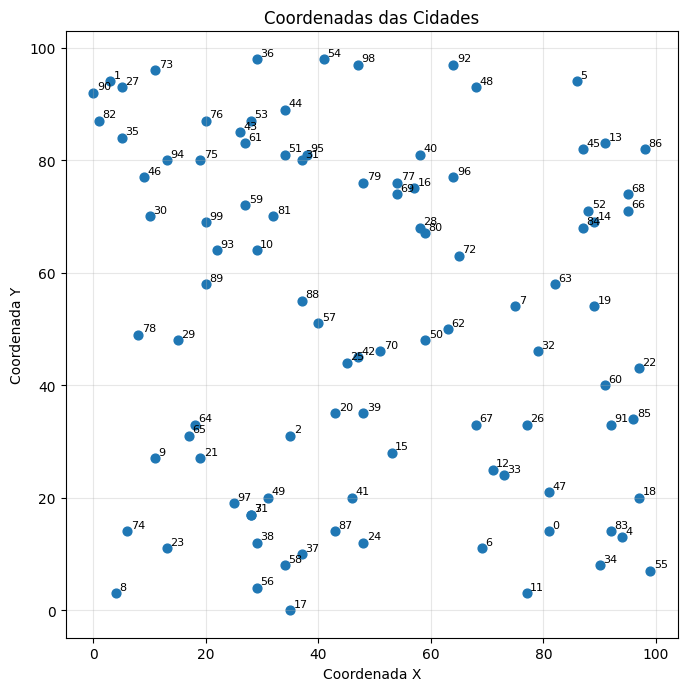

In [21]:
# plotar coordenadas_cidades
xs, ys = zip(*coordenadas_cidades)

plt.figure(figsize=(7,7))
plt.scatter(xs, ys, color='tab:blue', s=40)
for i, (x, y) in enumerate(coordenadas_cidades):
    plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)  # rótulo com índice da cidade

plt.title("Coordenadas das Cidades")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.grid(alpha=0.3)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

In [22]:
# um  caixeiro  deva  partir  de  sua  cidade,  visitar  clientes  em  outras  99  cidades  diferentes,  e 
# então  retornar  à  sua  cidade.  Dadas  as  coordenadas  das  100  cidades,  descubra  o  percurso  de  menor 
# distância que passe uma única vez por todas as cidades e retorne à cidade de origem

def calcular_distancia(cidade1, cidade2):
    return math.sqrt((cidade1[0] - cidade2[0]) ** 2 + (cidade1[1] - cidade2[1]) ** 2)

def calcular_percurso_total(percurso, coordenadas):
    distancia_total = 0
    for i in range(len(percurso) - 1):
        distancia_total += calcular_distancia(coordenadas[percurso[i]], coordenadas[percurso[i + 1]])
    distancia_total += calcular_distancia(coordenadas[percurso[-1]], coordenadas[percurso[0]])
    return distancia_total

In [28]:
# (3) Utilize no mínimo uma população com 100 indivíduos
TAMANHO_POPULACAO = 100
NUMERO_GERACOES = 1000

# (1) considere o cromossomo formado pelas cidades, onde a cidade de início (escolhida 
# aleatoriamente) deverá estar na posição 0 e 100 e a ordem das cidades visitadas nas posições de 
# 1 a 99 deverão ser definidas pelo algoritmo genético.
def populacaoInicial(tamanho, coordenadas_cidades):
    resultado = []
    n = len(coordenadas_cidades)
    for _ in range(tamanho):
        cidades_intermediarias = list(range(1, n))  # cidades 1 até n-1
        random.shuffle(cidades_intermediarias)
        rota = [0] + cidades_intermediarias + [0]   # começa e termina na cidade 0
        resultado.append(rota)
    return resultado

# (2) A função de avaliação deverá minimizar a distância euclidiana entre as cidades (os pontos).
def avaliacao(populacao, coordenadas_cidades):
  fit = []
  for v in populacao:
    fx = calcular_percurso_total(v, coordenadas_cidades)
    if fx == 0:
      fit.append( 999999 )
    else:
      fit.append( abs(1/fx) )
  return fit

def preservaMelhor(geracao, nova, coordenadas_cidades):
  ava = avaliacao(geracao, coordenadas_cidades)
  maior = 0
  for i in range(1,len(ava)):
    #print(f'comparando {maior} ({geracao[maior]} : {ava[maior]}) com {i} ({geracao[i]} :{ava[i]}) ')
    if ava[maior] < ava[i]:
      maior = i
  nova.append( geracao[maior] )
  #print('melhor: ', nova, geracao[maior])
  return geracao[maior]

def order_crossover(p1, p2):
    # Order Crossover (OX) para permutações (rotas) sem loop infinito.
    # Mantém posições 0 e -1 (origem/retorno) e realiza OX entre 1..n-2.

    n = len(p1)
    # inicializa filho preservando primeiro/último se presentes
    filho = [-1] * n
    filho[0] = p1[0]
    filho[-1] = p1[-1]

    # escolhe cortes entre 1 e n-2 (inclusive)
    corte1, corte2 = sorted(random.sample(range(1, n - 2), 2))

    # copia segmento do pai1
    filho[corte1:corte2 + 1] = p1[corte1:corte2 + 1]

    # prepara lista de posições a preencher (em ordem)
    posicoes_para_preencher = list(range(1, corte1)) + list(range(corte2 + 1, n - 1))
    # print(f'n: {n} cortes: {corte1}, {corte2}, posicoes_para_preencher: {posicoes_para_preencher}')

    # coleta genes de p2 (na ordem) que ainda não estão no filho
    genes_para_inserir = [g for g in p2[1:-1] if g not in filho]

    # preenche o filho nas posições restantes, sem deixar -1
    for pos, gene in zip(posicoes_para_preencher, genes_para_inserir):
        filho[pos] = gene

    return filho

def cruzamento(pop, qdade, nova):
    # Gera `qdade` filhos válidos a partir da população `pop` usando OX.
    # Adiciona os filhos na lista `nova`.

    qdeSaida = len(nova) + qdade
    while len(nova) < qdeSaida:
        indA, indB = random.sample(range(len(pop)), 2)
        p1 = pop[indA]
        p2 = pop[indB]
        # gera dois filhos (troca ordem dos pais)
        f1 = order_crossover(p1, p2)
        f2 = order_crossover(p2, p1)
        nova.append(f1)
        if len(nova) < qdeSaida:
            nova.append(f2)

def mutacao(pop, qdade, nova):

    # Mutação com seleção por roleta (fitness-proporcional).
    # Seleciona pais com probabilidade proporcional à avaliação e aplica swap mutation
    qdeSaida = len(nova) + qdade
    n = len(pop[0])
    fits = avaliacao(pop, coordenadas_cidades)
    # se todas as fitness forem zero, usa seleção uniforme
    if sum(fits) == 0:
        weights = None
    else:
        weights = fits
    while len(nova) < qdeSaida:
        pai = random.choices(pop, weights=weights, k=1)[0]
        filho = pai.copy()
        # evita trocar a posição 0 e a última (manter cidade de origem no início/fim)
        i, j = random.sample(range(1, n-1), 2)
        filho[i], filho[j] = filho[j], filho[i]
        nova.append(filho)

In [29]:
# passo 1
p0 = populacaoInicial(TAMANHO_POPULACAO, coordenadas_cidades)
print("Pop inicial: ", p0)

# avalia a pop. inicial
a0 = avaliacao(p0, coordenadas_cidades)
print("Avaliação", a0)

# fazemos a iteração, passos 3,4 e 5 do AG
geracao = p0
numGeracoes = NUMERO_GERACOES
while numGeracoes>0:
  nova = []

  # (6) Preserve sempre a melhor solução de uma geração para outra.
  preservaMelhor(geracao, nova, coordenadas_cidades)

  # (5) Utilize no mínimo de 90% de novos indivíduos obtidos pelo método de cruzamento (crossover-ox);
  qtd_cruzamento = int(0.90 * TAMANHO_POPULACAO)
  cruzamento(geracao, qtd_cruzamento, nova)

  # (4) Utilize no mínimo 1% de novos indivíduos obtidos pelo operador de mutação;
  qtd_mutacao = max(1, int(0.01 * TAMANHO_POPULACAO))
  mutacao(geracao, qtd_mutacao, nova)
  # completa até o tamanho desejado
  while len(nova) < TAMANHO_POPULACAO:
      cruzamento(geracao, qtd_cruzamento, nova)

  numGeracoes = numGeracoes - 1

  av = avaliacao(nova, coordenadas_cidades)

  # ordena a geracao com base na avaliacao
  nova2 = sorted(zip(av,nova),reverse=True)
  geracao = [x for _,x in nova2]

  # imprime a melhor solução a cada 100 gerações
  if numGeracoes % 100 == 0:
    print( f'Geracao {numGeracoes} melhor = {calcular_percurso_total(geracao[0], coordenadas_cidades)}' )

print(f'A primeira melhor solucao encontrada: {calcular_percurso_total(geracao[-1], coordenadas_cidades)}, {geracao[-1]}')
print(f'A melhor solucao encontrada: distancia = {calcular_percurso_total(geracao[0], coordenadas_cidades)}, {geracao[0]}')

Pop inicial:  [[0, 3, 76, 59, 4, 58, 70, 26, 19, 15, 47, 90, 93, 57, 60, 35, 79, 62, 40, 27, 61, 16, 44, 96, 28, 22, 81, 33, 9, 99, 43, 21, 10, 65, 86, 80, 73, 41, 77, 8, 66, 12, 31, 55, 25, 7, 5, 32, 51, 75, 83, 38, 71, 67, 82, 6, 1, 46, 85, 69, 92, 97, 20, 87, 68, 45, 88, 34, 14, 50, 53, 54, 23, 36, 49, 24, 42, 98, 95, 2, 94, 18, 11, 17, 72, 56, 37, 48, 78, 91, 64, 74, 63, 84, 29, 39, 89, 30, 52, 13, 0], [0, 31, 65, 37, 25, 90, 30, 15, 99, 23, 42, 94, 3, 19, 58, 51, 74, 17, 22, 97, 24, 68, 43, 2, 59, 33, 66, 88, 41, 73, 52, 48, 18, 96, 78, 7, 61, 87, 53, 12, 83, 1, 56, 26, 8, 11, 34, 16, 95, 50, 93, 29, 98, 21, 35, 57, 70, 86, 85, 71, 36, 14, 72, 27, 39, 79, 67, 49, 46, 9, 63, 32, 54, 4, 55, 10, 84, 91, 47, 75, 40, 92, 64, 13, 45, 81, 77, 20, 60, 80, 5, 28, 76, 38, 89, 6, 82, 62, 44, 69, 0], [0, 4, 83, 87, 79, 98, 74, 96, 6, 45, 21, 52, 16, 31, 28, 51, 86, 39, 26, 34, 8, 29, 37, 7, 43, 46, 11, 24, 90, 93, 89, 70, 80, 53, 23, 41, 20, 73, 13, 57, 10, 69, 72, 65, 54, 36, 64, 30, 25, 58,

In [30]:
def plotar_geracao(melhor_rota, coordenadas_cidades, titulo, color_line):
    xs_melhor_rota = [coordenadas_cidades[i][0] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][0]]
    ys_melhor_rota = [coordenadas_cidades[i][1] for i in melhor_rota] + [coordenadas_cidades[melhor_rota[0]][1]]
    plt.figure(figsize=(7,7))
    plt.plot(xs_melhor_rota, ys_melhor_rota, '-o', color=color_line, alpha=0.8)
    plt.scatter(xs, ys, color='tab:blue', s=40)
    for i, (x, y) in enumerate(coordenadas_cidades):
        plt.text(x + 0.6, y + 0.6, str(i), fontsize=8)
    distancia_melhor = calcular_percurso_total(melhor_rota, coordenadas_cidades)
    plt.title(f"{titulo} - Distância ≈ {distancia_melhor:.2f}")
    plt.xlabel("Coordenada X")
    plt.ylabel("Coordenada Y")
    plt.grid(alpha=0.3)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

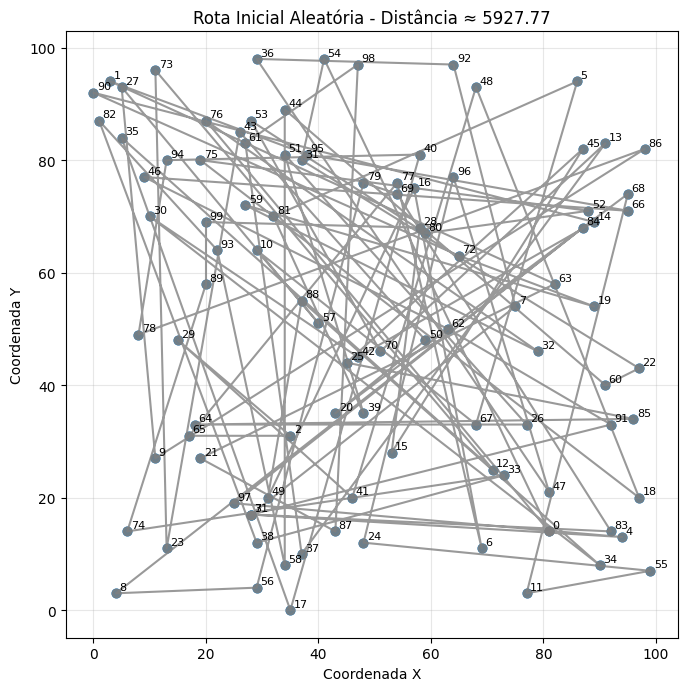

In [31]:
#plotar a rota inicial
plotar_geracao(geracao[-1], coordenadas_cidades, "Rota Inicial Aleatória", 'gray')

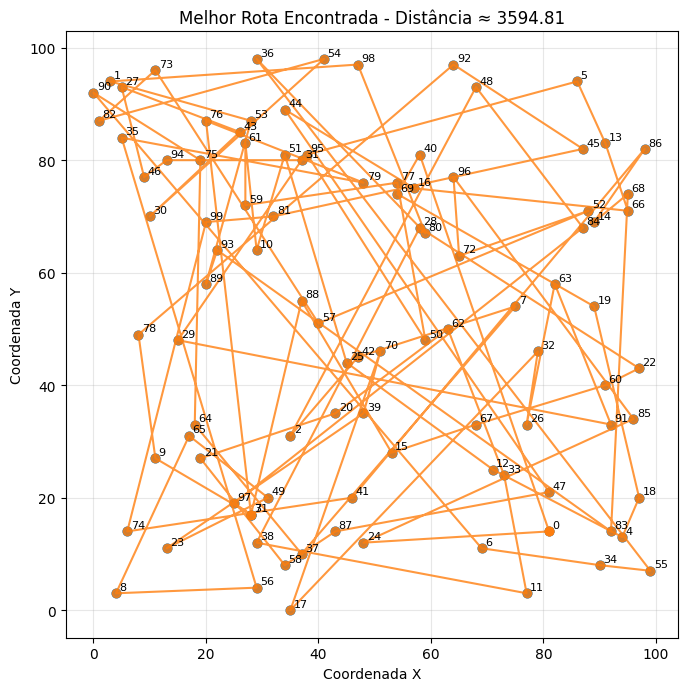

In [32]:
#plotar a melhor rota encontrada
plotar_geracao(geracao[0], coordenadas_cidades, "Melhor Rota Encontrada", 'tab:orange')

2) Compare a representação de dois modelos vetoriais  

Pegue um texto relativamente pequeno, o objetivo será visualizar a representação vetorial, que poderá 
ser um vetor por palavra ou por sentença. Seja qual for a situação, considere a quantidade de palavras ou 
sentenças onde tenha no mínimo duas similares e no mínimo 6 textos, que deverão produzir no mínimo 
6 vetores. Também limite o número máximo, para que a visualização fique clara e objetiva. 
 
O  trabalho  consiste  em  pegar  os  fragmentos  de  texto  e  codificá-las  na  forma  vetorial.  Após  obter  os 
vetores, imprima-os em figuras (plot) que demonstrem a projeção desses vetores usando a PCA. 
 
O PDF deverá conter o código-fonte e as imagens obtidas.